# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# let's make a cities lat/lng list
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

622


## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


## Convert Raw Data to DataFrame
* Save as csv

In [5]:
#create url base & units variable
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#load api key
from api_keys import weather_api_key

#create lists for dataframe
testcity = []
lat = []
lng = []
mtemp = []
hum = []
cldy = []
wspd = []
ctry = []
date = []
i = 0

# loop through cities to get weather & create new dataframe
for city in cities:
    #timer - take 50 API calls per minute max
    if (i+1) % 50 == 0:
        time.sleep(60)    
    print(f"Making request number: {i} for ID: {cities[i]}")
    query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q="
    target_url = query_url + city
    #print(target_url)
    #xx = input("this is target url")
    response = requests.get(target_url).json()
    
    #look for errors
    try:
        testcity.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        mtemp.append(response['main']["temp_max"])
        hum.append(response['main']["humidity"])
        cldy.append(response["clouds"]["all"])                             
        wspd.append(response["wind"]["speed"])                             
        ctry.append(response["sys"]["country"])                             
        date.append(response["dt"])
        #newdate = pd.to_datetime(response["dt"],unit = 's')
        #date.append(newdate)                         
    except(KeyError):
        print(f" {city} not found")
    i = i+1       
            
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": testcity,
    "lat": lat,
    "lng": lng,
    "max_temp": mtemp,
    "humidity": hum,
    "cloudiness": cldy,
    "wind_speed": wspd,
    "country": ctry,
    "date": date
        
}
weather_data = pd.DataFrame(weather_dict)


weather_data.head(25)

Making request number: 0 for ID: mataura
Making request number: 1 for ID: alyangula
Making request number: 2 for ID: stromness
Making request number: 3 for ID: yellowknife
Making request number: 4 for ID: chivacoa
Making request number: 5 for ID: port alfred
Making request number: 6 for ID: airai
Making request number: 7 for ID: cape town
Making request number: 8 for ID: jamestown
Making request number: 9 for ID: yaan
Making request number: 10 for ID: fort myers beach
Making request number: 11 for ID: ushuaia
Making request number: 12 for ID: pevek
Making request number: 13 for ID: clifton
Making request number: 14 for ID: buala
Making request number: 15 for ID: porbandar
Making request number: 16 for ID: clemson
Making request number: 17 for ID: khatanga
Making request number: 18 for ID: saskylakh
Making request number: 19 for ID: abdanan
Making request number: 20 for ID: san patricio
Making request number: 21 for ID: albany
Making request number: 22 for ID: hithadhoo
Making request n

Making request number: 179 for ID: pampa
Making request number: 180 for ID: dingle
Making request number: 181 for ID: tual
Making request number: 182 for ID: nikolskoye
Making request number: 183 for ID: lolua
 lolua not found
Making request number: 184 for ID: eureka
Making request number: 185 for ID: port lincoln
Making request number: 186 for ID: tumannyy
 tumannyy not found
Making request number: 187 for ID: gimli
Making request number: 188 for ID: benguela
Making request number: 189 for ID: sur
Making request number: 190 for ID: kruisfontein
Making request number: 191 for ID: goma
Making request number: 192 for ID: rion
Making request number: 193 for ID: santiago de cuba
Making request number: 194 for ID: chengde
Making request number: 195 for ID: melfort
Making request number: 196 for ID: saint-augustin
Making request number: 197 for ID: dawei
Making request number: 198 for ID: arvika
Making request number: 199 for ID: semnan
Making request number: 200 for ID: los llanos de arida

Making request number: 359 for ID: eaton socon
Making request number: 360 for ID: racine
Making request number: 361 for ID: todos santos
Making request number: 362 for ID: lambarene
Making request number: 363 for ID: tonantins
Making request number: 364 for ID: pasighat
Making request number: 365 for ID: nurota
Making request number: 366 for ID: orocue
Making request number: 367 for ID: mahebourg
Making request number: 368 for ID: matara
Making request number: 369 for ID: dustlik
Making request number: 370 for ID: nemuro
Making request number: 371 for ID: monte santo
Making request number: 372 for ID: tabuk
Making request number: 373 for ID: great yarmouth
Making request number: 374 for ID: teluknaga
Making request number: 375 for ID: warren
Making request number: 376 for ID: amboasary
Making request number: 377 for ID: arman
Making request number: 378 for ID: aykhal
Making request number: 379 for ID: caravelas
Making request number: 380 for ID: nanortalik
Making request number: 381 fo

Making request number: 539 for ID: tuatapere
Making request number: 540 for ID: melita
Making request number: 541 for ID: the pas
Making request number: 542 for ID: kieta
Making request number: 543 for ID: paita
Making request number: 544 for ID: bolungarvik
 bolungarvik not found
Making request number: 545 for ID: necochea
Making request number: 546 for ID: bose
Making request number: 547 for ID: beaufort
Making request number: 548 for ID: at-bashi
Making request number: 549 for ID: lodja
Making request number: 550 for ID: tam ky
Making request number: 551 for ID: holetown
Making request number: 552 for ID: acapulco
Making request number: 553 for ID: nokaneng
Making request number: 554 for ID: iguape
Making request number: 555 for ID: seminole
Making request number: 556 for ID: gilgit
Making request number: 557 for ID: antalaha
Making request number: 558 for ID: rupert
Making request number: 559 for ID: vanimo
Making request number: 560 for ID: ouanaminthe
Making request number: 561 f

,city,lat,lng,max_temp,humidity,cloudiness,wind_speed,country,date
0,Mataura,-46.19,168.86,44.01,89,96,1.99,NZ,1603211273
1,Alyangula,-13.85,136.42,78.80,88,17,2.24,AU,1603210769
2,Stromness,58.97,-3.30,50.00,93,90,21.92,GB,1603211278
3,Yellowknife,62.46,-114.35,24.80,85,75,3.36,CA,1603210854
4,Chivacoa,10.16,-68.89,87.80,43,100,10.29,VE,1603211278
5,Port Alfred,-33.59,26.89,63.57,64,82,19.75,ZA,1603211278
6,Airai,-8.93,125.41,61.47,80,100,1.86,TL,1603211278
7,Cape Town,-33.93,18.42,64.00,51,3,17.22,ZA,1603211278
8,Jamestown,42.10,-79.24,48.99,100,90,6.93,US,1603211088
9,Yaan,7.38,8.57,85.46,71,50,2.80,NG,1603211195


In [21]:
from datetime import datetime as dt
import datetime
#timestamp = datetime.datetime.fromtimestamp(iloc.weather_data['date':0])
chartdate = []

#create chart date
s = weather_data["date"]
timestamp = datetime.datetime.fromtimestamp(s[0])
chartdate = (timestamp.strftime('%m-%d-%Y'))

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

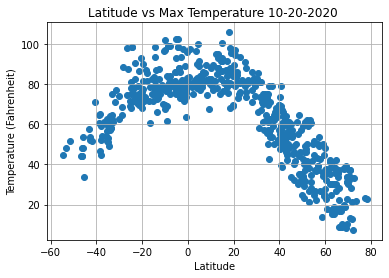

In [7]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["max_temp"], marker="o")

# Incorporate the other graph properties
plt.title(f"Latitude vs Max Temperature {chartdate} ")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs. Temperature.png")

# Show plot
plt.show()

### Latitude vs. Humidity Plot

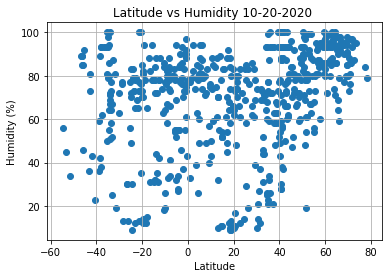

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f"Latitude vs Humidity {chartdate} ")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs. Humidity.png")

# Show plot
plt.show()


### Latitude vs. Cloudiness Plot

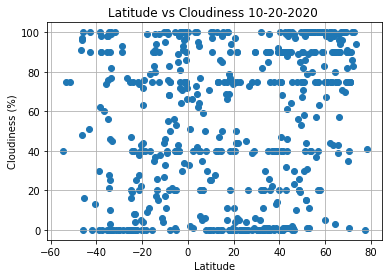

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f"Latitude vs Cloudiness {chartdate} ")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs. Cloudiness.png")

# Show plot
plt.show()


### Latitude vs. Wind Speed Plot

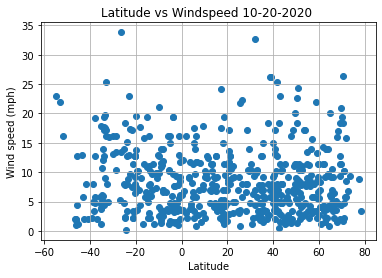

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["wind_speed"], marker="o")

# Incorporate the other graph properties
plt.title(f"Latitude vs Windspeed {chartdate} ")
plt.ylabel("Wind speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs. Wind Speed.png")

# Show plot
plt.show()


## Linear Regression

### Write linear regression plot function (optional)

In [11]:
# create the north & south hemisphere dataframes

#create new dataframes
n_weather_data = weather_data.loc[weather_data["lat"] >= 0]

s_weather_data = weather_data.loc[weather_data["lat"] < 0]



###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

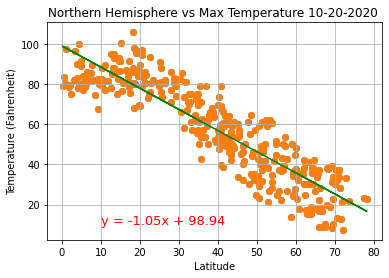

In [12]:
# Build a scatter plot for each data type
plt.scatter(n_weather_data["lat"], n_weather_data["max_temp"], marker="o")

# Incorporate the other graph properties
plt.title(f"Northern Hemisphere vs Max Temperature {chartdate} ")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)


x_values = n_weather_data["lat"]
y_values = n_weather_data["max_temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_weather_data["lat"],n_weather_data["max_temp"])
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-", color = "green")
plt.annotate(line_eq,(10,10),fontsize=13,color="red")
plt.scatter(x_values,y_values)


# Save the figure
plt.savefig("Northern Hemisphere vs Temperature w-LG.png")

# Show plot
plt.show()


###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

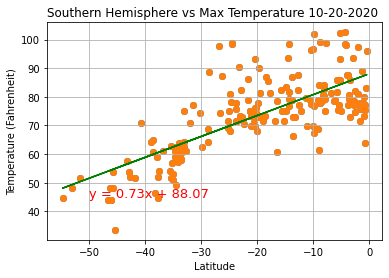

In [13]:
# Build a scatter plot for each data type
plt.scatter(s_weather_data["lat"], s_weather_data["max_temp"], marker="o")

# Incorporate the other graph properties
plt.title(f"Southern Hemisphere vs Max Temperature {chartdate} ")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)


x_values = s_weather_data["lat"]
y_values = s_weather_data["max_temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_weather_data["lat"],s_weather_data["max_temp"])
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-", color = "green")
plt.annotate(line_eq,(-50,45),fontsize=13,color="red")
plt.scatter(x_values,y_values)


# Save the figure
plt.savefig("Southern Hemisphere vs Temperature w-LG.png")

# Show plot
plt.show()


###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

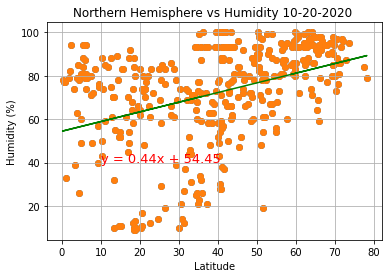

In [14]:
# Build a scatter plot for each data type
plt.scatter(n_weather_data["lat"], n_weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f"Northern Hemisphere vs Humidity {chartdate} ")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


x_values = n_weather_data["lat"]
y_values = n_weather_data["humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_weather_data["lat"],n_weather_data["humidity"])
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-", color = "green")
plt.annotate(line_eq,(10,40),fontsize=13,color="red")
plt.scatter(x_values,y_values)


# Save the figure
plt.savefig("Northern Hemisphere vs. Humidity w-LG.png")


# Show plot
plt.show()

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

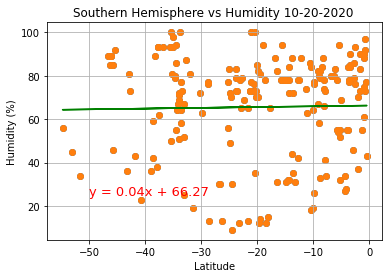

In [15]:
# Build a scatter plot for each data type
plt.scatter(s_weather_data["lat"], s_weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f"Southern Hemisphere vs Humidity {chartdate} ")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


x_values = s_weather_data["lat"]
y_values = s_weather_data["humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_weather_data["lat"],s_weather_data["humidity"])
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-", color = "green")
plt.annotate(line_eq,(-50,25),fontsize=13,color="red")
#plt.annotate(line_eq,'best',fontsize=13,color="red")

plt.scatter(x_values,y_values)


# Save the figure
plt.savefig("Southern Hemisphere vs Humidity w-LG.png")

# Show plot
plt.show()


###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

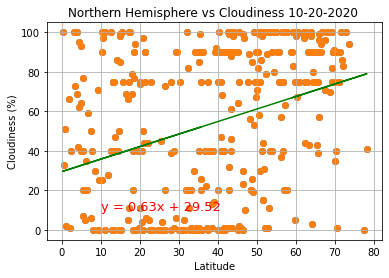

In [16]:
# Build a scatter plot for each data type
plt.scatter(n_weather_data["lat"], n_weather_data["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f"Northern Hemisphere vs Cloudiness {chartdate} ")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


x_values = n_weather_data["lat"]
y_values = n_weather_data["cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_weather_data["lat"],n_weather_data["cloudiness"])
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-", color = "green")
plt.annotate(line_eq,(10,10),fontsize=13,color="red")
plt.scatter(x_values,y_values)


# Save the figure
plt.savefig("Northern Hemisphere vs Cloudiness w-LG.png")


# Show plot
plt.show()

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

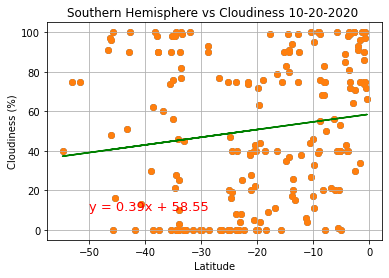

In [17]:
# Build a scatter plot for each data type
plt.scatter(s_weather_data["lat"], s_weather_data["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f"Southern Hemisphere vs Cloudiness {chartdate} ")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


x_values = s_weather_data["lat"]
y_values = s_weather_data["cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_weather_data["lat"],s_weather_data["cloudiness"])
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-", color = "green")
plt.annotate(line_eq,(-50,10),fontsize=13,color="red")
plt.scatter(x_values,y_values)


# Save the figure
plt.savefig("Southern Hemisphere vs Cloudiness w-LG.png")

# Show plot
plt.show()


###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

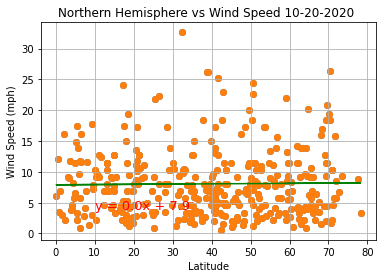

In [18]:
# Build a scatter plot for each data type
plt.scatter(n_weather_data["lat"], n_weather_data["wind_speed"], marker="o")

# Incorporate the other graph properties
plt.title(f"Northern Hemisphere vs Wind Speed {chartdate} ")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


x_values = n_weather_data["lat"]
y_values = n_weather_data["wind_speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_weather_data["lat"],n_weather_data["wind_speed"])
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-", color = "green")
plt.annotate(line_eq,(10,4),fontsize=13,color="red")
plt.scatter(x_values,y_values)


# Save the figure
plt.savefig("Northern Hemisphere vs Wind Speed -LG.png")


# Show plot
plt.show()

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

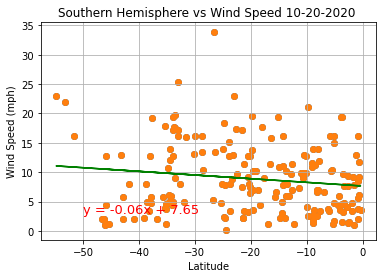

In [19]:
# Build a scatter plot for each data type
plt.scatter(s_weather_data["lat"], s_weather_data["wind_speed"], marker="o")

# Incorporate the other graph properties
plt.title(f"Southern Hemisphere vs Wind Speed {chartdate} ")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


x_values = s_weather_data["lat"]
y_values = s_weather_data["wind_speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_weather_data["lat"],s_weather_data["wind_speed"])
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-", color = "green")
plt.annotate(line_eq,(-50,3),fontsize=13,color="red")
plt.scatter(x_values,y_values)


# Save the figure
plt.savefig("Southern Hemisphere vs Wind Speed w-LG.png")

# Show plot
plt.show()


In [20]:
#create .csv file
weather_data.to_csv(r'..\weatherpy-outfile.csv', index = False)

The linear regressions shows us what we would expect in the Latitude vs Temperature plots.  When broken down to Northern and Southern hemispheres, the is a increase in temperature as you approach the 0 degree latitude.  The Northern hemisphere has a negative slope line and the Southern hemisphere as a positive slope line.  The other charts show no real trends when it comes to latitude vs wind or humidity or cloudiness.